In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import scipy
from scipy.optimize import leastsq , curve_fit
from scipy.signal import find_peaks


In [6]:
from lmfit.models import ExponentialModel, GaussianModel,LorentzianModel, QuadraticModel

In [186]:
from heapq import nsmallest

In [202]:
import lumispy

In [ ]:
from pyphotonics.photoluminescence import Photoluminescence

In [ ]:
#pl-data

In [7]:
pl= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\pl.xlsx')

In [8]:
pl.dropna(axis=1, how='all',inplace=True)

In [9]:
pl.dropna(axis=0, how='any',inplace=True)

In [10]:
pl=pl.copy().rename(columns={'Unnamed: 0': 'wavelength'})

In [15]:
pl

,wavelength,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5
0,351.0,8.362423,8.322040,5.846693,4.614909,9.212210
1,351.5,8.367572,8.322989,5.878439,4.651046,9.213130
2,352.0,8.357429,8.328711,5.880992,4.667770,9.182086
3,352.5,8.319901,8.334703,5.875514,4.699085,9.158171
4,353.0,8.285076,8.350400,5.862088,4.751971,9.134147
...,...,...,...,...,...,...
533,617.5,6.476886,6.660176,5.873828,2.764193,8.550463
534,618.0,6.431819,6.648390,5.863926,2.756905,8.530504
535,618.5,6.391367,6.639472,5.850224,2.746599,8.523877
536,619.0,6.366954,6.637024,5.828432,2.739335,8.525598


In [16]:
#excitation wavelenght = 325nm 

In [11]:
#x
x=(((pl.iloc[:,0:1]).to_numpy()).flatten())

In [12]:
#sample1
y1=(((pl.iloc[:,1:2]).to_numpy()).flatten())
#sample2
y2=(((pl.iloc[:,2:3]).to_numpy()).flatten())
#sample3
y3=(((pl.iloc[:,3:4]).to_numpy()).flatten())
#sample4
y4=(((pl.iloc[:,4:5]).to_numpy()).flatten())
#sample5
y5=(((pl.iloc[:,5:6]).to_numpy()).flatten())

# curve fitting

In [20]:
def lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2 )

def multi_lorentz( x, params ):
    off = params[0]
    paramsRest = params[1:]
    assert not ( len( paramsRest ) % 3 )
    return off + sum( [ lorentzian( x, *paramsRest[ i : i+3 ] ) for i in range( 0, len( paramsRest ), 3 ) ] )

def res_multi_lorentz( params, xData, yData ):
    diff = [ multi_lorentz( x, params ) - y for x, y in zip( xData, yData ) ]
    return diff

In [24]:
def fit (x,y):
    y0 =y
    yData =y
    xData =x

    yGround = min( yData ) 
    yData = yData - yGround
    yAmp = max( yData )
    yData = yData / yAmp 

    #initial properties of peaks 
    pk, properties = find_peaks( yData, height = .05, width = 3 )
    #extract peak heights and fwhm 

    I = properties [ 'peak_heights' ]
    fwhm = properties[ 'widths' ]


    guess = [0]

    for i in range( len( pk ) ): 
        guess.append( pk[i] )
        guess.append( I[i] )
        guess.append( fwhm[i] ) 
        
    guess=np.array( guess )


    

    popt, pcov = leastsq( res_multi_lorentz , x0=guess, args=( xData, yData ) )
#x0=Initial guess on independent variables 
# print( popt )


    testData = [ multi_lorentz( x, popt ) for x in xData ]
    fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]
    
    #plot

    fig= plt.figure( figsize=( 20, 10 ) )

    ax= fig.add_subplot( 2, 1, 1 )
    ax.plot( pk, yData[pk], 'o', ms=5 )
    ax.plot( xData, yData, 'ok', ms=1 )
    ax.plot( xData, testData , 'r--', lw=1.5 )

    bx= fig.add_subplot( 2, 1, 2 )

    bx.plot( xData, y0, ls='', marker='o', markersize=2 )
    bx.plot( xData, fitData )


    plt.show()

In [51]:
def fwhm (fitData):
    y=fitData
    pk, properties = find_peaks(y , height=.05, width = 3 ) 
#pk returns peaks position  
# properties returns other properties associated with the peaks

    I = properties ['peak_heights'] #amplitude
    fwhm= (properties['widths']) #full width half maximum 

    res={ 'amplitude':I 
               , 'fwhm':fwhm}

    return res

#sample1

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


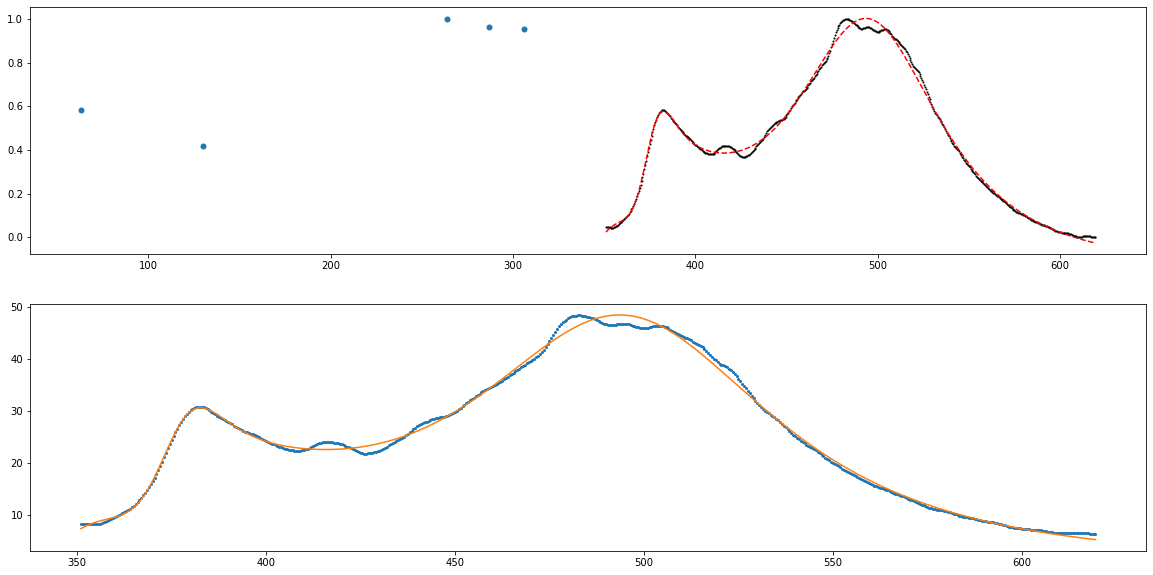

In [49]:
fit(x,y1)

[[Model]]
    (((((Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='lz1_')) + Model(lorentzian, prefix='lz2_')) + Model(lorentzian, prefix='lz3_')) + Model(lorentzian, prefix='lz4_')) + Model(lorentzian, prefix='lz5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3767
    # data points      = 538
    # variables        = 18
    chi-square         = 213.959094
    reduced chi-square = 0.41145980
    Akaike info crit   = -460.075658
    Bayesian info crit = -382.894204
    R-squared          = 0.99757636
[[Variables]]
    bkg_a:         -3.2135e-04 +/- 8.1990e-04 (255.15%) (init = 0)
    bkg_b:          0.48769772 +/- 1.07578753 (220.58%) (init = 0)
    bkg_c:         -184.993159 +/- 359.290823 (194.22%) (init = 0)
    lz1_amplitude:  1632.52104 +/- 3340.46705 (204.62%) (init = 2.45)
    lz1_center:     346.842911 +/- 6.40169113 (1.85%) (init = 382.5)
    lz1_sigma:      17.7184133 +/- 9.84396859 (55.56%) (init = 2.34)
    lz1_fwhm:       35.43

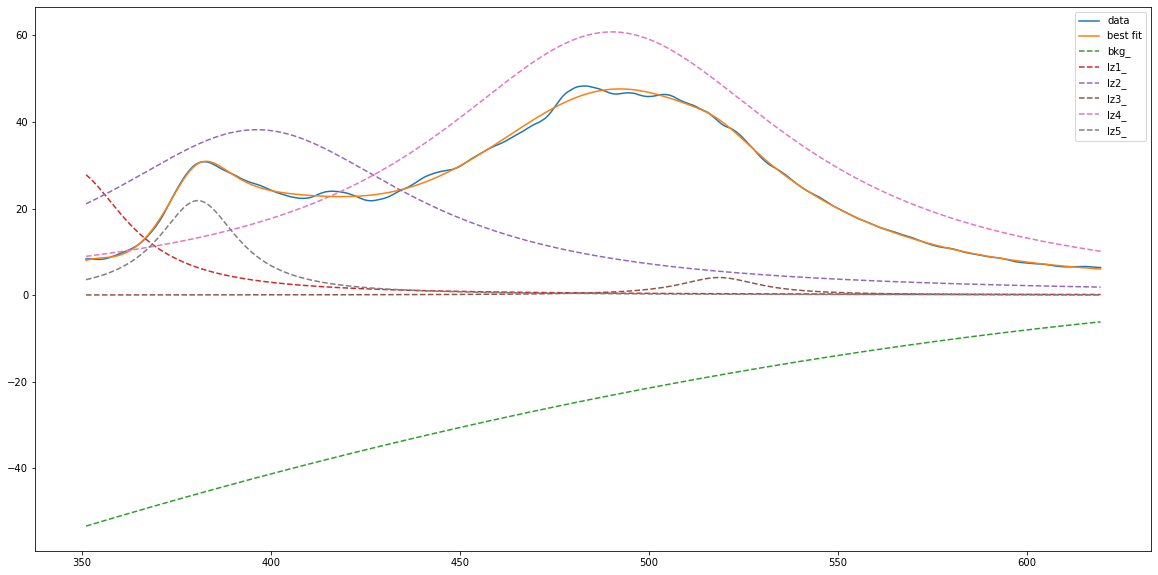

In [99]:
xdat = x
ydat = y1
def add_peak(prefix, center, amplitude=2.45, sigma=2.34):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (382.5,	416.0,	483.0,	494.5,	504.0)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

print(result.fit_report(min_correl=0.5))


plt.figure( figsize=( 20, 10 ) )

plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# sample2

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


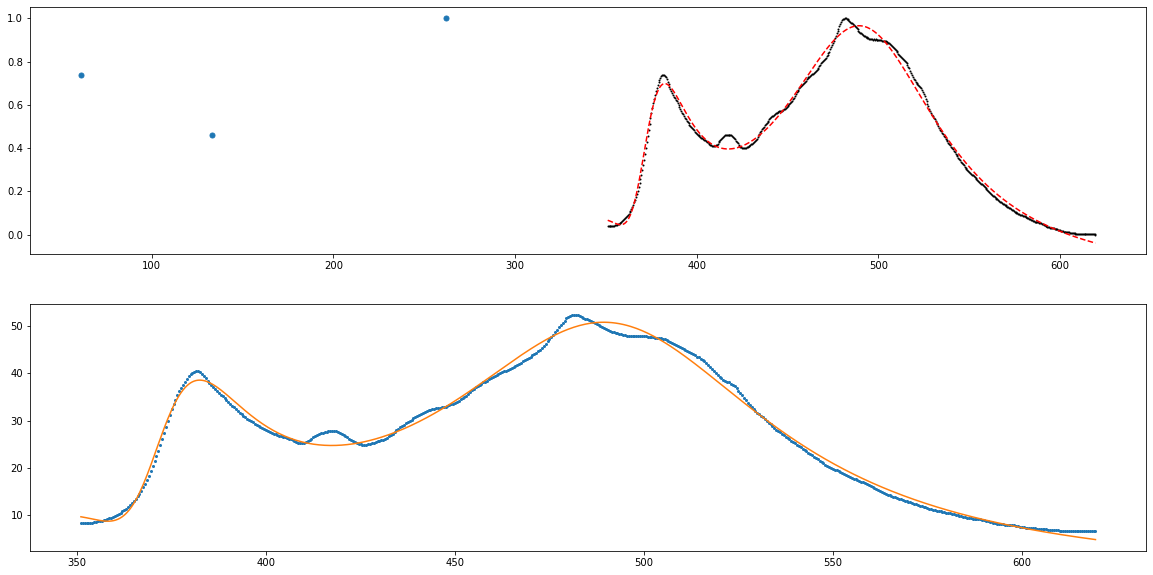

In [27]:
fit(x,y2)

[[Model]]
    (((((Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='lz1_')) + Model(lorentzian, prefix='lz2_')) + Model(lorentzian, prefix='lz3_')) + Model(lorentzian, prefix='lz4_')) + Model(lorentzian, prefix='lz5_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38000
    # data points      = 538
    # variables        = 18
    chi-square         = 321.599738
    reduced chi-square = 0.61846104
    Akaike info crit   = -240.828350
    Bayesian info crit = -163.646896
    R-squared          = 0.99690179
##  Warning: uncertainties could not be estimated:
[[Variables]]
    bkg_a:         -0.00103922 (init = 0)
    bkg_b:          1.10004489 (init = 0)
    bkg_c:         -252.115909 (init = 0)
    lz1_amplitude:  989.870445 (init = 1.5)
    lz1_center:     512.986713 (init = 381.5)
    lz1_sigma:      21.3271316 (init = 1.2)
    lz1_fwhm:       42.6542632 == '2.0000000*lz1_sigma'
    lz1_height:     14.7739306 == '0.3183099*lz1_amplitude/max(1e-

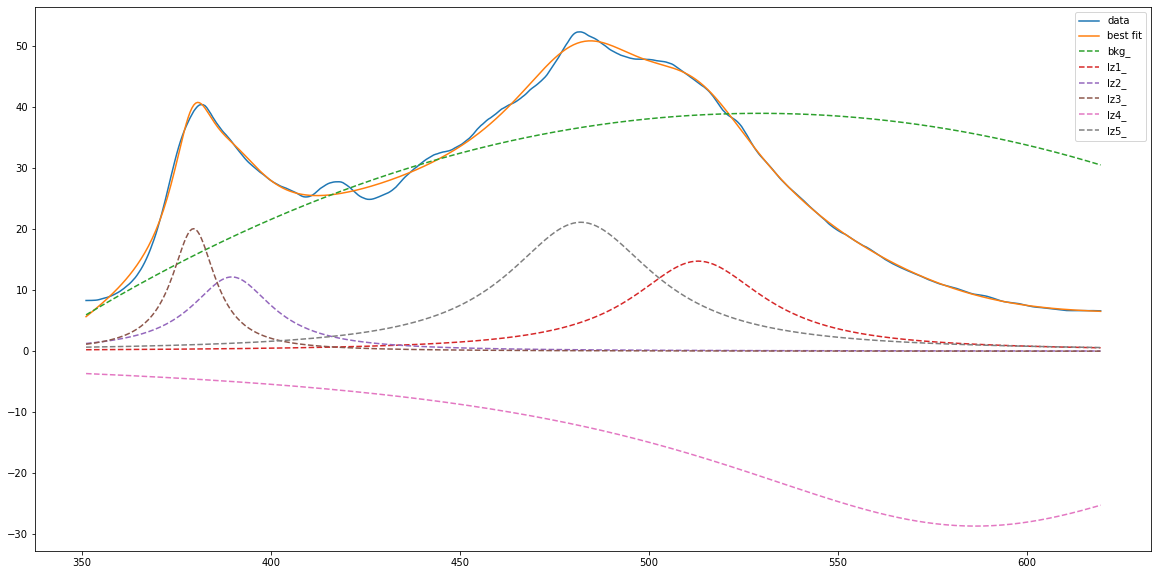

In [114]:
xdat = x
ydat = y2
def add_peak(prefix, center, amplitude=1.5, sigma=1.2):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (381.5	,417.5,482.0,	497.5,	498.5)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

print(result.fit_report(min_correl=0.5))


plt.figure( figsize=( 20, 10 ) )

plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# sampl3

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


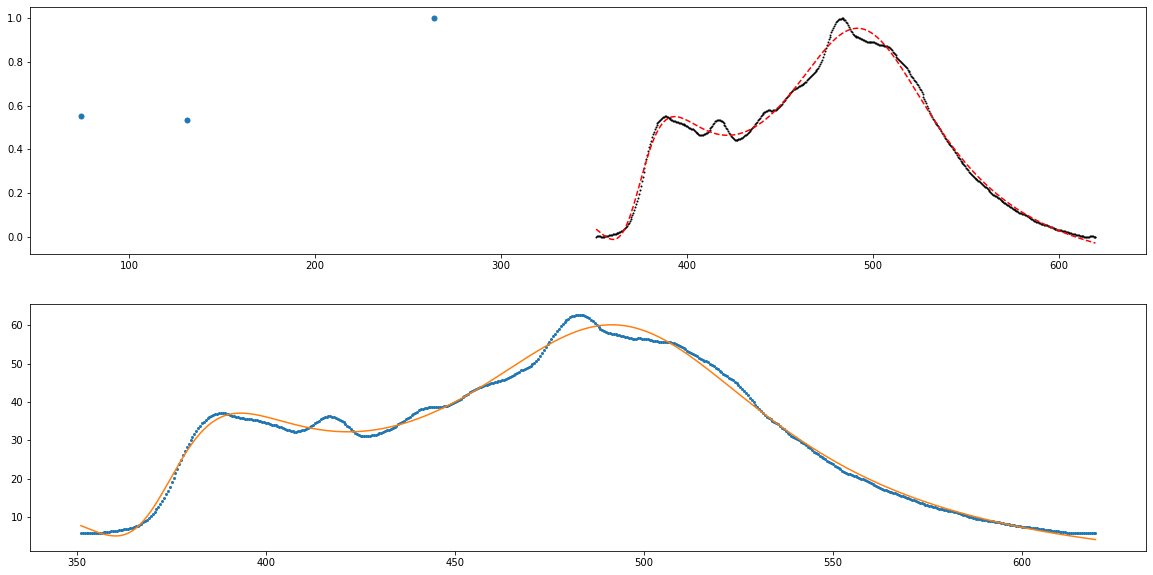

In [28]:
fit(x,y3)

# sample4

In [59]:
    y0 =y4
    yData =y4
    xData =x

    yGround = min( yData ) 
    yData = yData - yGround
    yAmp = max( yData )
    yData = yData / yAmp 

    #initial properties of peaks 
    # height=np.array([16.91907028982027,	8.826463880410214	,14.376432608520542	,2.5407853483704,
    # 	6.6865560971685065,	0.7080834495413246,	1.957225920131286,	5.505855192279222	,0.09858016110780439])
    pk, properties = find_peaks( yData, height = 0.09, width = 3 )
    #extract peak heights and fwhm 

    I = properties [ 'peak_heights' ]
    fwhm = properties[ 'widths' ]


    guess = [0]

    for i in range( len( pk ) ): 
        guess.append( pk[i] )
        guess.append( I[i] )
        guess.append( fwhm[i] ) 
        
    guess=np.array( guess )

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 3400.
  warnings.warn(errors[info][0], RuntimeWarning)


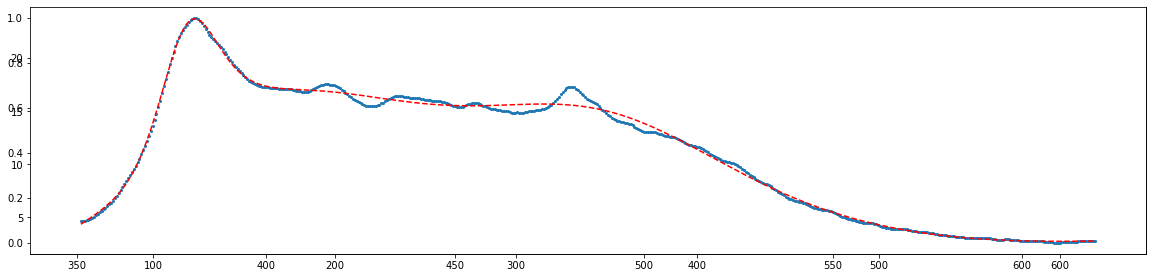

In [60]:
    popt, pcov = leastsq( res_multi_lorentz , x0=guess, args=( xData, yData ))
#x0=Initial guess on independent variables 
# print( popt 


    testData = [ multi_lorentz( x, popt ) for x in xData ]

    fitData = [ yGround + yAmp * multi_lorentz( x, popt ) for x in xData ]
    
    #plot

    fig= plt.figure( figsize=( 20, 10 ) )

    ax= fig.add_subplot( 2, 1, 1 )
    ax.plot( pk, yData[pk], 'o', ms=5 )
    ax.plot( xData, yData, 'ok', ms=1 )
    ax.plot( xData, testData , 'o--', lw=1.5 )

    bx= fig.add_subplot( 2, 1, 1 )

    bx.plot( xData, y0, ls='', marker='o', markersize=2 )

    bx.plot( xData, fitData , 'r--')


    plt.show()

[[Model]]
    (((((((((Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='lz1_')) + Model(lorentzian, prefix='lz2_')) + Model(lorentzian, prefix='lz3_')) + Model(lorentzian, prefix='lz4_')) + Model(lorentzian, prefix='lz5_')) + Model(lorentzian, prefix='lz6_')) + Model(lorentzian, prefix='lz7_')) + Model(lorentzian, prefix='lz8_')) + Model(lorentzian, prefix='lz9_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12046
    # data points      = 538
    # variables        = 30
    chi-square         = 5.07312955
    reduced chi-square = 0.00998648
    Akaike info crit   = -2449.17856
    Bayesian info crit = -2320.54280
    R-squared          = 0.99974378
[[Variables]]
    bkg_a:         -1.7921e-04 +/- 1.1342e-04 (63.29%) (init = 0)
    bkg_b:          0.24403039 +/- 0.14260961 (58.44%) (init = 0)
    bkg_c:         -81.7764420 +/- 45.2335272 (55.31%) (init = 0)
    lz1_amplitude:  122.974258 +/- 41.2512553 (33.54%) (init = 4.995067)
    lz1_center

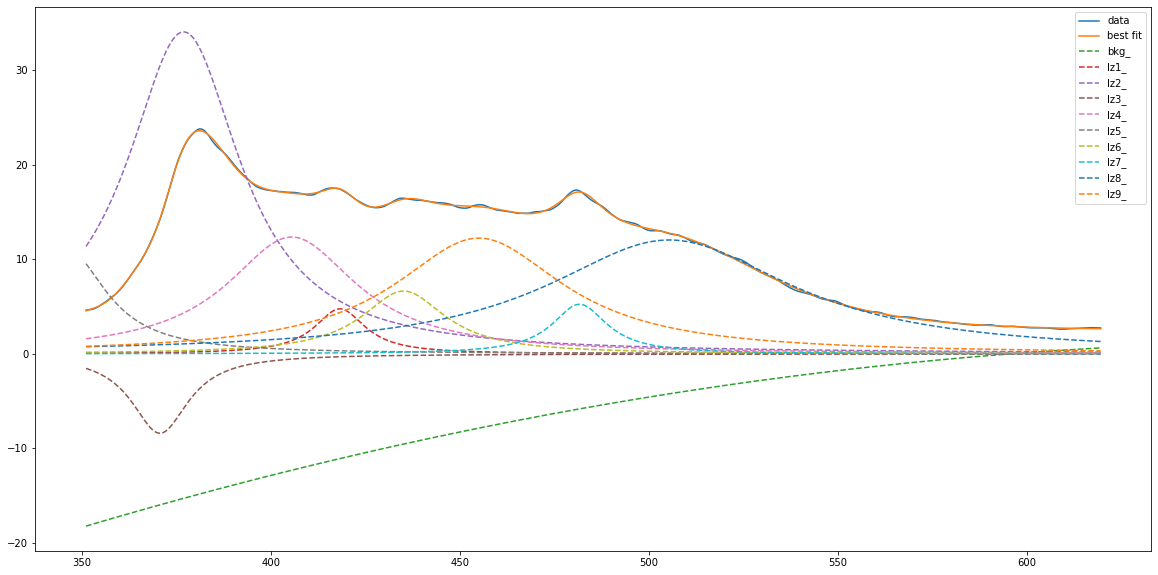

In [87]:
xdat = x
ydat = y4
def add_peak(prefix, center, amplitude=4.99506703599645, sigma=4.99506703599645):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (381.0	,402.5	,416.0,	434.5,	455.0	,466.5,	470.0,	481.0,	502.0)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

print(result.fit_report(min_correl=0.5))


plt.figure( figsize=( 20, 10 ) )

plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# sample5

c:\Users\Asus\anaconda3\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


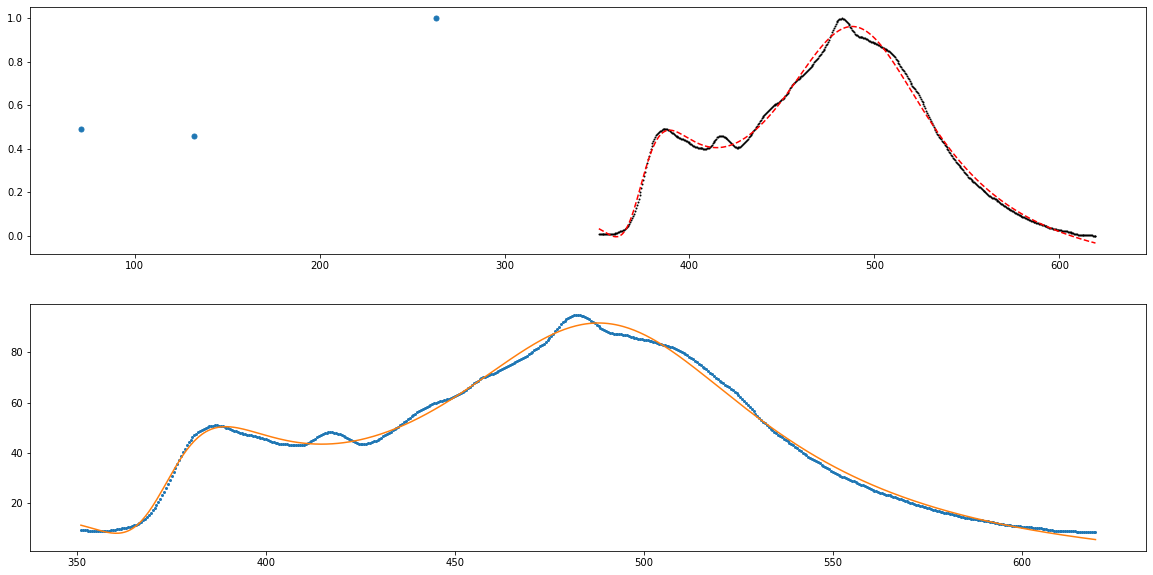

In [30]:
fit(x,y5)

[[Model]]
    (((Model(parabolic, prefix='bkg_') + Model(lorentzian, prefix='lz1_')) + Model(lorentzian, prefix='lz2_')) + Model(lorentzian, prefix='lz3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5211
    # data points      = 538
    # variables        = 12
    chi-square         = 2530.92182
    reduced chi-square = 4.81163844
    Akaike info crit   = 857.082408
    Bayesian info crit = 908.536710
    R-squared          = 0.99327201
[[Variables]]
    bkg_a:         -0.00172076 +/- 1.2697e-04 (7.38%) (init = 0)
    bkg_b:          1.75933640 +/- 0.11572299 (6.58%) (init = 0)
    bkg_c:         -411.372623 +/- 24.9932901 (6.08%) (init = 0)
    lz1_amplitude: -7115.73135 +/- 2949.70512 (41.45%) (init = 3.4)
    lz1_center:     563.425789 +/- 3.70606417 (0.66%) (init = 386.5)
    lz1_sigma:      69.1233135 +/- 14.2124917 (20.56%) (init = 3)
    lz1_fwhm:       138.246627 +/- 28.4249834 (20.56%) == '2.0000000*lz1_sigma'
    lz1_height:    -32.7676383 +

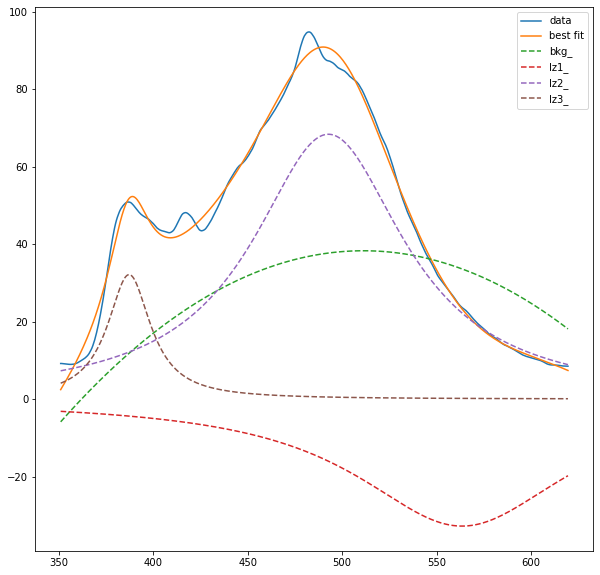

In [28]:
xdat = x
ydat = y5
def add_peak(prefix, center, amplitude=3.4, sigma=3):
    peak = LorentzianModel(prefix=prefix)
    pars = peak.make_params()
    pars[prefix + 'center'].set(center)
    pars[prefix + 'amplitude'].set(amplitude)
    pars[prefix + 'sigma'].set(sigma, min=0)
    return peak, pars

model = QuadraticModel(prefix='bkg_')
params = model.make_params(a=0, b=0, c=0)

rough_peak_positions = (386.5,	417.0	,482.5)
for i, cen in enumerate(rough_peak_positions):
    peak, pars = add_peak('lz%d_' % (i+1), cen)
    model = model + peak
    params.update(pars)

init = model.eval(params, x=xdat)
result = model.fit(ydat, params, x=xdat)
comps = result.eval_components()

print(result.fit_report(min_correl=0.5))


plt.figure( figsize=( 10, 10 ) )

plt.plot(xdat, ydat, label='data')
plt.plot(xdat, result.best_fit, label='best fit')
for name, comp in comps.items():
    plt.plot(xdat, comp, '--', label=name)
plt.legend(loc='upper right')
plt.show()

# Uv

In [98]:
uv= pd.read_excel(r'C:\Users\Asus\Desktop\solar_cell\Paper 1\absorption.xlsx' ,sheet_name='Sheet2')

In [99]:
uv.dropna(axis=1, how='all',inplace=True)

In [100]:
uv=uv.copy().rename(columns={'Unnamed: 0': 'wavelength(nm)',
                           })

In [101]:
uv.drop(['Unnamed: 3','Unnamed: 6','Unnamed: 9','Unnamed: 12'], axis=1, inplace=True)